# Pandas Guided Practice

***

### GP Goals

For this Guided Practice we will work with the Titanic dataset, in this instance provided by uesr NotAyushXD on github.

Their profile can be found here: https://github.com/NotAyushXD

Our goals will be to explore basic to intermediate Pandas including:

- Variable Types
- Data Frames
- Data Inspection
- Data Visualization

## Import pandas

In [1]:
# First import pandas with alias
import pandas as pd

# Import dataset from url
url = "https://raw.githubusercontent.com/NotAyushXD/Titanic-dataset/master/train.csv"
titanic = pd.read_csv(url)

One of the most important first steps when conducting data cleaning and exploration is to inspect the variable types, and identify relevant variables. When working with pandas dataframes, efficient method to use when inspecting variables is the `.head()` method which will return the first rows of a dataset.

In [2]:
# View first five rows of titanic dataframe
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


When working with pandas dataframes and datasets in general it is important to make sure that variables within the dataset are associated with the appropriate data type.

This will ensure that we are able to conduct analysis on our data.
We can use the `.dtypes` accessor to view the data types associated with the variables in our dataframe. 

Generally speaking:

| Variable Type | Typical Data Types |
|---------------|--------------------|
| Continuous    | `float`            |
| Discrete      | `int`              |
| Binary        | `bool`,`str`,`int` |
| Nominal       | `str`,`int`        |
| Ordinal       | `str`,`int`        |

In [3]:
# View data types of each variable in titanic dataframe
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

 In Python, there is a Pandas-specific data type for categorical variables called 'category' which makes it possible to store category names with associated values as an attribute (other languages have comparable data types, like the `factor` variable in R). The `pandas.Categorical` function will allow us to convert categorical data to this data type. 
 
 Let's explore creating a ranking to the `Pclass` variable. First we can use the `.unique()` method to view the unique values within `Pclass`.

## `.unique()` / `.nunique()`

In [4]:
# View all unique values used in Pclass
titanic["Pclass"].unique()

array([3, 1, 2])

In [5]:
# View count of unique values used in Pclass
titanic["Pclass"].nunique()

3

## `pd.Categorical()`

Let's assume the order of ranking among the values in Pclass is 3 < 2 < 1, so that 1 would represent 1st class, 2 represents 2nd class, and 3 represents 3rd class.

To allow Python to understand this ranking, we can utilize the pandas.Categorical() function and sest an order to the values in the variable. Let's apply this function to the Pclass variable:

In [6]:
# Give a ranking to the Pclass variable
titanic["Pclass"] = pd.Categorical(values=titanic["Pclass"], categories=[3,2,1], ordered=True)

Now when we use the `.unique()` method applied to `Pclass` Python will inform us of the ranking within the variable:

In [7]:
# Check the order of the Pclass variable
titanic["Pclass"].unique()

[3, 1, 2]
Categories (3, int64): [3 < 2 < 1]

If we use the `dtypes` accessor again, we can see that the `Pclass` variable has a new data type as well: `categorical`:

In [8]:
# Review the data types of the titanic dataframe
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

With an order to the `Pclass` variable set, we can also use the `.sort_values()` method to order the rows within our dataframe based on the ranking within `Pclass`:

In [9]:
# Sort values in titanic based on Pclass values with order applied
titanic.sort_values("Pclass")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S


When importing and exporting datasets, variables are sometimes assigned data types that don't make sense given how they are meant to be interpreted or used. 

For example, if age (a continuous variable) is represented as a character string, it will be impossible to perform numerical operations on it. 

In this case, it is important to alter data types so that models and operations can be applied in a sensical way. 

Here we can use the `.astype()` method to change the data type of the variable. Let's use `.astype()` on the `Age` variable to alter it from a `float` to an `int` datatype:


In [10]:
# Change data type of Age variable to integer
# titanic["Age"].astype(int)

Because we are missing values, pandas is not able to convert the data type of `Age` to integer. To resolve this let's first take a look at the values within the variable:

In [11]:
# View unique values in Age variable
titanic["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

For this lab, we can manage the missing values by using the `.fillna()` method. Here we will utilize the forward fill parameter which will propagate non-null values forward to fill in any missing values:

In [12]:
# Fill in null values in Age variable
titanic["Age"] = titanic["Age"].fillna(method="ffill")

We can check that there are no missing values by using the `.isna()` method on the variable chained with the `.any()` method:

In [13]:
# Check for null values in Age variable
titanic["Age"].isna().any()

False

Great, now that we know there are no longer any null values, we should be able to change the data type:

In [14]:
# Change data type of Age variable to integer
titanic["Age"].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    19
889    26
890    32
Name: Age, Length: 891, dtype: int64

Now our variable contains only whole numbers to represent the age of each passenger on the titanic!

With this, we could plot the `Age` variable against another variable in our DataFrame.

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

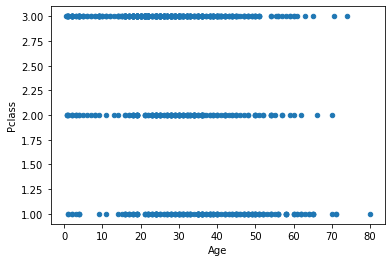

In [15]:
# create a scatterplot with Age and another variable
# using only pandas
titanic.plot.scatter(x="Age", y="Pclass")

In [16]:
# import seaborn and matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

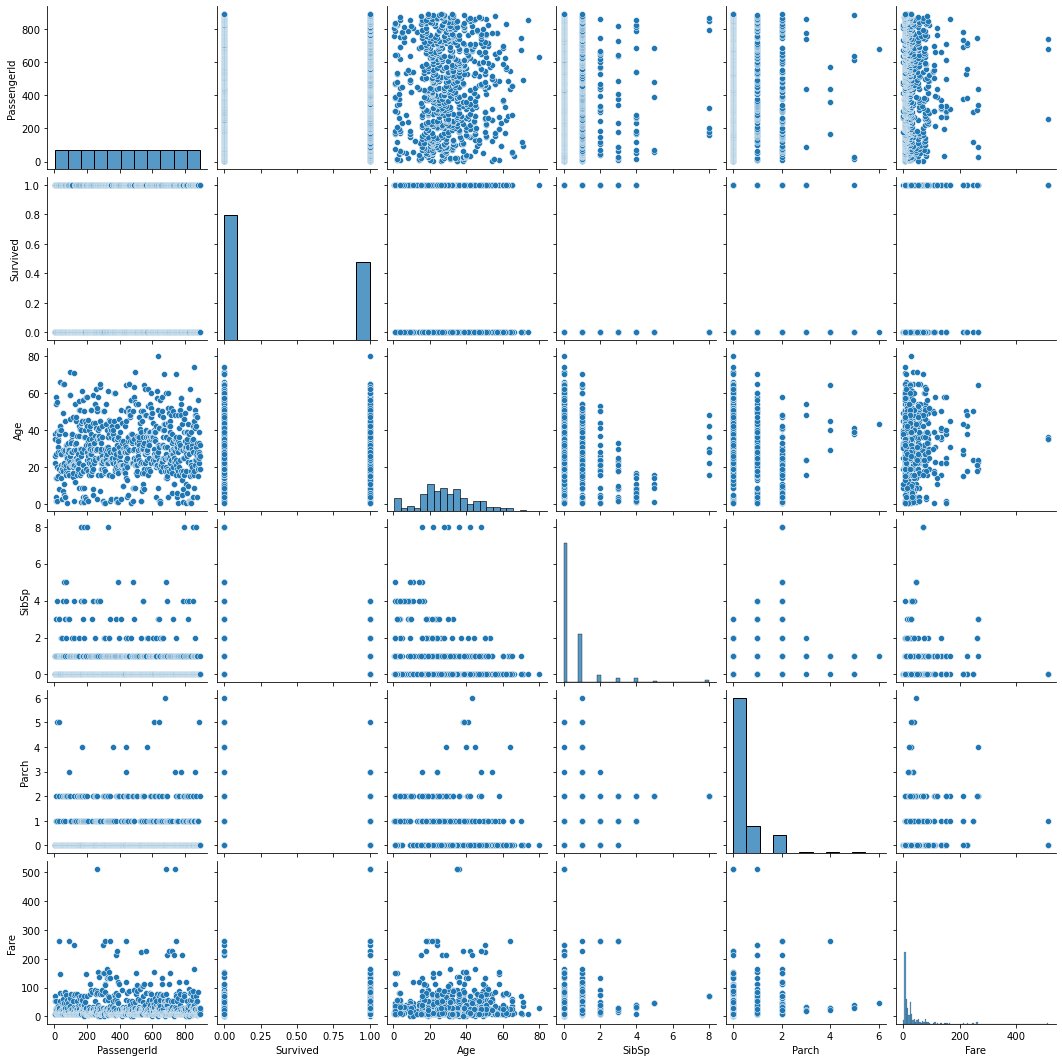

In [17]:
# create a pairplot with seaborn
sns.pairplot(titanic)

<AxesSubplot:>

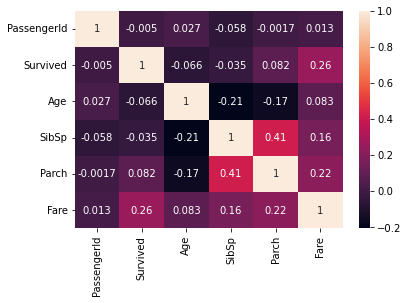

In [18]:
# create a heatmap
# to view correlation between variables
sns.heatmap(titanic.corr(), annot=True)

## `.groupby()`

We can group our data by variables using the `.groupby()` method. 

In SQL, if we wanted to understand how many males survived, or how many females we would call something like this: 
    
      SELECT Survived, Sex, count(*)
      FROM titanic
      GROUP BY Survived, Sex
      ORDER BY Survived, Sex;   
      
With pandas, we can envoke this functionality with `.groupby()`.

In [19]:
# group the data by the survived and sex variables
# returning the count 
s_s_count = titanic.groupby(["Survived", "Sex"])["Age"].count()
# check variable
s_s_count.head()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Age, dtype: int64

In [20]:
## Q/A